>This notebook is for learning a modular approach to creating PyTorch projects. Here, we focus on the practical use of previously created modular files (e.g., for data loading, model building, training), and not on achieving the best model results on the dataset. The goal is to understand and practice organizing code into modules.

In [3]:
import torch
from sklearn.metrics import confusion_matrix

from pathlib import Path
import requests
import zipfile

import matplotlib.pyplot as plt
import seaborn as sns

from going_modular.transformations import simple_transform, trivial_transform, auto_augment_transform
from going_modular import plotting, data_setup, model_builder, predictions
from going_modular.path_file import data_dir, images_dir, train_dir, test_dir


## 1. Get the data and set the data diretories

In [2]:
#%% gathering data
PATH_DATA = data_dir
IMAGE_DATA = images_dir


if IMAGE_DATA.exists():
    print('Directory arleady exist')
else:
    Path.mkdir(IMAGE_DATA)
    print('Directory has been created')

with open(IMAGE_DATA / 'pizza_steak_sushi.zip', 'wb') as f:
    request = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip')
    f.write(request.content)
    print('Zip has been downloaded')

with zipfile.ZipFile(IMAGE_DATA / 'pizza_steak_sushi.zip', 'r') as zip_ref:
    zip_ref.extractall(IMAGE_DATA)
    print('Zip has been extracted')

Path.unlink(IMAGE_DATA / 'pizza_steak_sushi.zip')
print('Zip file has been deleted')

Directory has been created
Zip has been downloaded
Zip has been extracted
Zip file has been deleted


## 2.  Plot trasformations

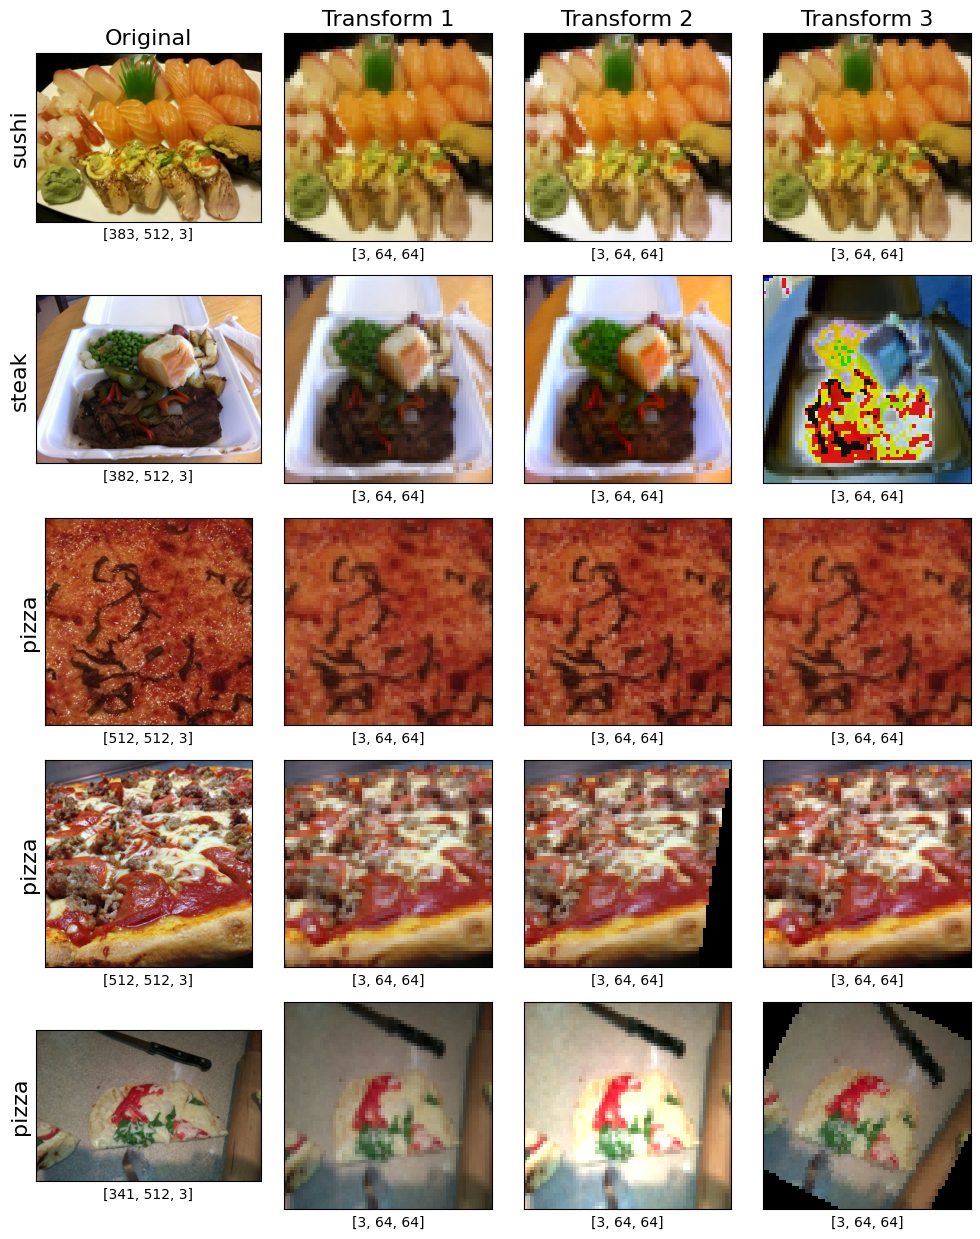

In [4]:
plotting.plot_transform(path=train_dir, transform=[simple_transform, trivial_transform, auto_augment_transform], n=5)

## 3. Models training

>`model_0` trained on simple transformation data

In [71]:
!python -m going_modular.train --epochs 10 --batch_size 32 --learning_rate 0.001 -t simple_transform -tt simple_transform --hidden_units 10 --num_workers 1

Directory "models\model_0" has been created
--------------------------------------------------
Epoch: 0
Train ->  Loss: 1.102 | Accuracy: 0.29
Test  ->  Loss: 1.092 | Accuracy: 0.62

Saved model to "models\model_0\best.pt"
--------------------------------------------------
Epoch: 1
Train ->  Loss: 1.089 | Accuracy: 0.37
Test  ->  Loss: 1.05 | Accuracy: 0.57

Saved model to "models\model_0\best.pt"
--------------------------------------------------
Epoch: 2
Train ->  Loss: 1.072 | Accuracy: 0.34
Test  ->  Loss: 1.079 | Accuracy: 0.29

--------------------------------------------------
Epoch: 3
Train ->  Loss: 1.071 | Accuracy: 0.46
Test  ->  Loss: 1.02 | Accuracy: 0.59

Saved model to "models\model_0\best.pt"
--------------------------------------------------
Epoch: 4
Train ->  Loss: 0.989 | Accuracy: 0.55
Test  ->  Loss: 1.018 | Accuracy: 0.53

Saved model to "models\model_0\best.pt"
--------------------------------------------------
Epoch: 5
Train ->  Loss: 0.977 | Accuracy: 0.44
Test

In [72]:
!python -m going_modular.train --epochs 10 --batch_size 32 --learning_rate 0.001 -t trivial_transform -tt simple_transform --hidden_units 10 --num_workers 1

Directory "models\model_1" has been created
--------------------------------------------------
Epoch: 0
Train ->  Loss: 1.107 | Accuracy: 0.26
Test  ->  Loss: 1.108 | Accuracy: 0.24

Saved model to "models\model_1\best.pt"
--------------------------------------------------
Epoch: 1
Train ->  Loss: 1.083 | Accuracy: 0.4
Test  ->  Loss: 1.147 | Accuracy: 0.2

--------------------------------------------------
Epoch: 2
Train ->  Loss: 1.082 | Accuracy: 0.41
Test  ->  Loss: 1.175 | Accuracy: 0.2

--------------------------------------------------
Epoch: 3
Train ->  Loss: 1.082 | Accuracy: 0.41
Test  ->  Loss: 1.163 | Accuracy: 0.2

--------------------------------------------------
Epoch: 4
Train ->  Loss: 1.118 | Accuracy: 0.29
Test  ->  Loss: 1.151 | Accuracy: 0.2

--------------------------------------------------
Epoch: 5
Train ->  Loss: 1.081 | Accuracy: 0.41
Test  ->  Loss: 1.109 | Accuracy: 0.2

--------------------------------------------------
Epoch: 6
Train ->  Loss: 1.095 | Accu

In [73]:
!python -m going_modular.train --epochs 10 --batch_size 32 --learning_rate 0.001 -t auto_augment_transform -tt simple_transform --hidden_units 10 --num_workers 1

Directory "models\model_2" has been created
--------------------------------------------------
Epoch: 0
Train ->  Loss: 1.104 | Accuracy: 0.27
Test  ->  Loss: 1.102 | Accuracy: 0.26

Saved model to "models\model_2\best.pt"
--------------------------------------------------
Epoch: 1
Train ->  Loss: 1.099 | Accuracy: 0.26
Test  ->  Loss: 1.087 | Accuracy: 0.54

Saved model to "models\model_2\best.pt"
--------------------------------------------------
Epoch: 2
Train ->  Loss: 1.11 | Accuracy: 0.24
Test  ->  Loss: 1.092 | Accuracy: 0.26

--------------------------------------------------
Epoch: 3
Train ->  Loss: 1.095 | Accuracy: 0.43
Test  ->  Loss: 1.101 | Accuracy: 0.26

--------------------------------------------------
Epoch: 4
Train ->  Loss: 1.101 | Accuracy: 0.3
Test  ->  Loss: 1.111 | Accuracy: 0.26

--------------------------------------------------
Epoch: 5
Train ->  Loss: 1.092 | Accuracy: 0.43
Test  ->  Loss: 1.124 | Accuracy: 0.26

--------------------------------------------

## 4. Models Comprashion

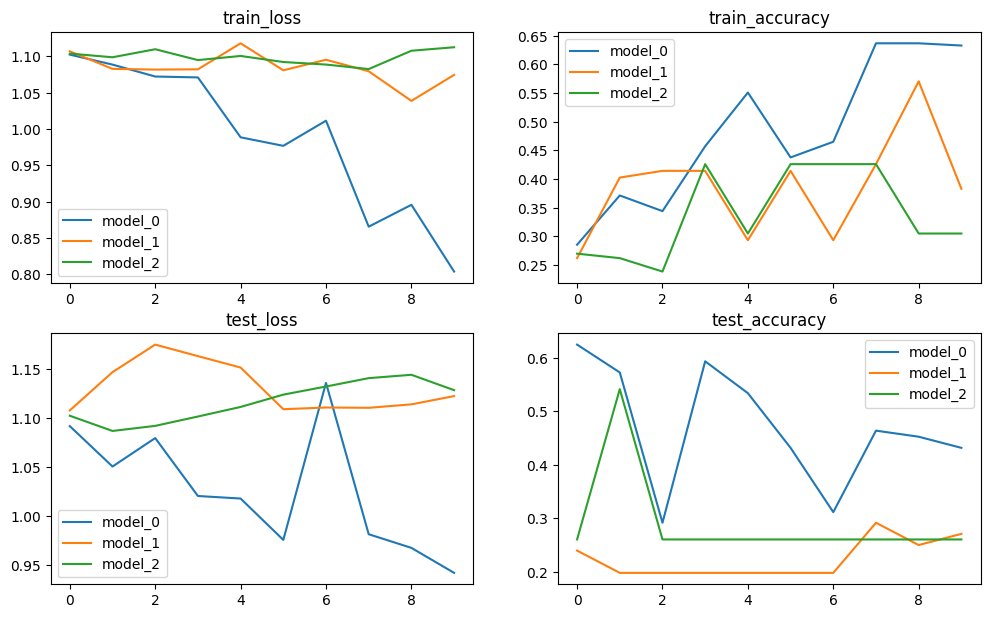

In [74]:
plotting.plot_all_models_result()

## 5. Train longer

In [75]:
!python -m going_modular.train --epochs 20 --batch_size 32 --learning_rate 0.001 -t simple_transform -tt simple_transform --hidden_units 10 --num_workers 1

Directory "models\model_3" has been created
--------------------------------------------------
Epoch: 0
Train ->  Loss: 1.095 | Accuracy: 0.38
Test  ->  Loss: 1.094 | Accuracy: 0.26

Saved model to "models\model_3\best.pt"
--------------------------------------------------
Epoch: 1
Train ->  Loss: 1.102 | Accuracy: 0.3
Test  ->  Loss: 1.117 | Accuracy: 0.26

--------------------------------------------------
Epoch: 2
Train ->  Loss: 1.1 | Accuracy: 0.36
Test  ->  Loss: 1.116 | Accuracy: 0.3

--------------------------------------------------
Epoch: 3
Train ->  Loss: 1.054 | Accuracy: 0.54
Test  ->  Loss: 1.005 | Accuracy: 0.58

Saved model to "models\model_3\best.pt"
--------------------------------------------------
Epoch: 4
Train ->  Loss: 1.007 | Accuracy: 0.52
Test  ->  Loss: 0.969 | Accuracy: 0.57

Saved model to "models\model_3\best.pt"
--------------------------------------------------
Epoch: 5
Train ->  Loss: 0.987 | Accuracy: 0.46
Test  ->  Loss: 0.946 | Accuracy: 0.45

Saved 

In [76]:
!python -m going_modular.train --epochs 20 --batch_size 32 --learning_rate 0.001 -t trivial_transform -tt simple_transform --hidden_units 10 --num_workers 1

Directory "models\model_4" has been created
--------------------------------------------------
Epoch: 0
Train ->  Loss: 1.115 | Accuracy: 0.25
Test  ->  Loss: 1.108 | Accuracy: 0.26

Saved model to "models\model_4\best.pt"
--------------------------------------------------
Epoch: 1
Train ->  Loss: 1.095 | Accuracy: 0.3
Test  ->  Loss: 1.077 | Accuracy: 0.54

Saved model to "models\model_4\best.pt"
--------------------------------------------------
Epoch: 2
Train ->  Loss: 1.119 | Accuracy: 0.28
Test  ->  Loss: 1.089 | Accuracy: 0.26

--------------------------------------------------
Epoch: 3
Train ->  Loss: 1.086 | Accuracy: 0.47
Test  ->  Loss: 1.107 | Accuracy: 0.25

--------------------------------------------------
Epoch: 4
Train ->  Loss: 1.092 | Accuracy: 0.4
Test  ->  Loss: 1.111 | Accuracy: 0.28

--------------------------------------------------
Epoch: 5
Train ->  Loss: 1.045 | Accuracy: 0.58
Test  ->  Loss: 1.093 | Accuracy: 0.29

--------------------------------------------

In [77]:
!python -m going_modular.train --epochs 20 --batch_size 32 --learning_rate 0.001 -t auto_augment_transform -tt simple_transform --hidden_units 10 --num_workers 1

Directory "models\model_5" has been created
--------------------------------------------------
Epoch: 0
Train ->  Loss: 1.102 | Accuracy: 0.25
Test  ->  Loss: 1.101 | Accuracy: 0.2

Saved model to "models\model_5\best.pt"
--------------------------------------------------
Epoch: 1
Train ->  Loss: 1.088 | Accuracy: 0.41
Test  ->  Loss: 1.112 | Accuracy: 0.2

--------------------------------------------------
Epoch: 2
Train ->  Loss: 1.077 | Accuracy: 0.41
Test  ->  Loss: 1.146 | Accuracy: 0.2

--------------------------------------------------
Epoch: 3
Train ->  Loss: 1.114 | Accuracy: 0.29
Test  ->  Loss: 1.125 | Accuracy: 0.2

--------------------------------------------------
Epoch: 4
Train ->  Loss: 1.085 | Accuracy: 0.46
Test  ->  Loss: 1.076 | Accuracy: 0.56

Saved model to "models\model_5\best.pt"
--------------------------------------------------
Epoch: 5
Train ->  Loss: 1.091 | Accuracy: 0.32
Test  ->  Loss: 1.047 | Accuracy: 0.59

Saved model to "models\model_5\best.pt"
------

## 6. Plot models comphrasion

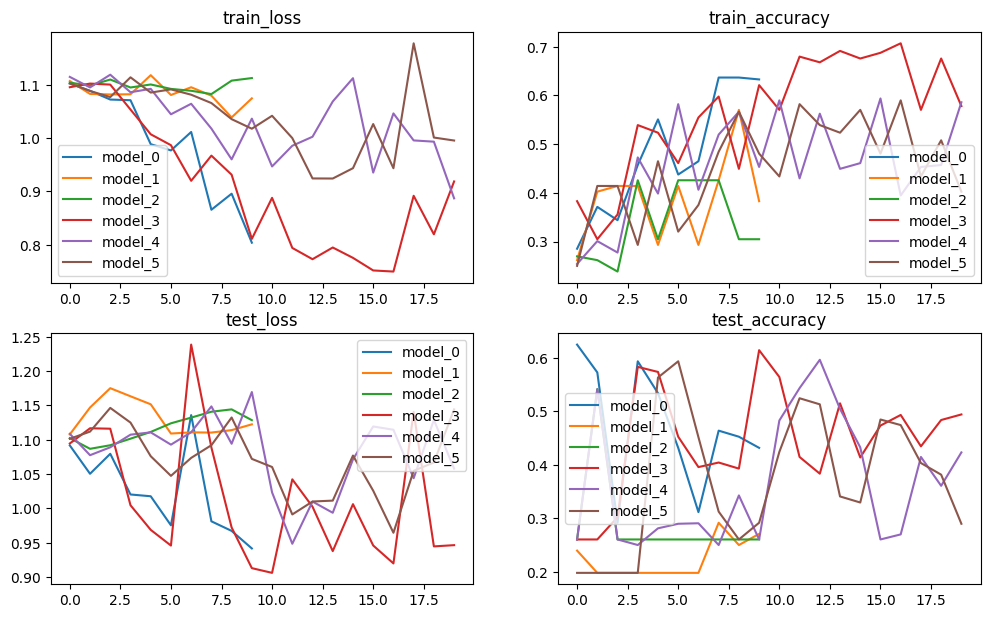

In [78]:
plotting.plot_all_models_result()

## 7. Load best model

In [79]:
data = data_setup.DataManager(train_dir=train_dir, test_dir=test_dir, transform=simple_transform, test_transform=simple_transform)

model = model_builder.TinyVGG(in_channels=3, hidden_units=10, out_features=len(data.classes))

In [80]:
model.load_state_dict(torch.load('models/model_3/best.pt', weights_only=True))

<All keys matched successfully>

## 8. Model Evaluate

In [81]:
y = data.test_dataset.targets
y_pred = predictions.predict(model=model, dataset=data.test_dataset)

good_preds = [y for (y, y_pred) in zip(y, y_pred) if y==y_pred]

accuracy = len(good_preds) / len(y)
accuracy

0.49333333333333335

Images plot: 12



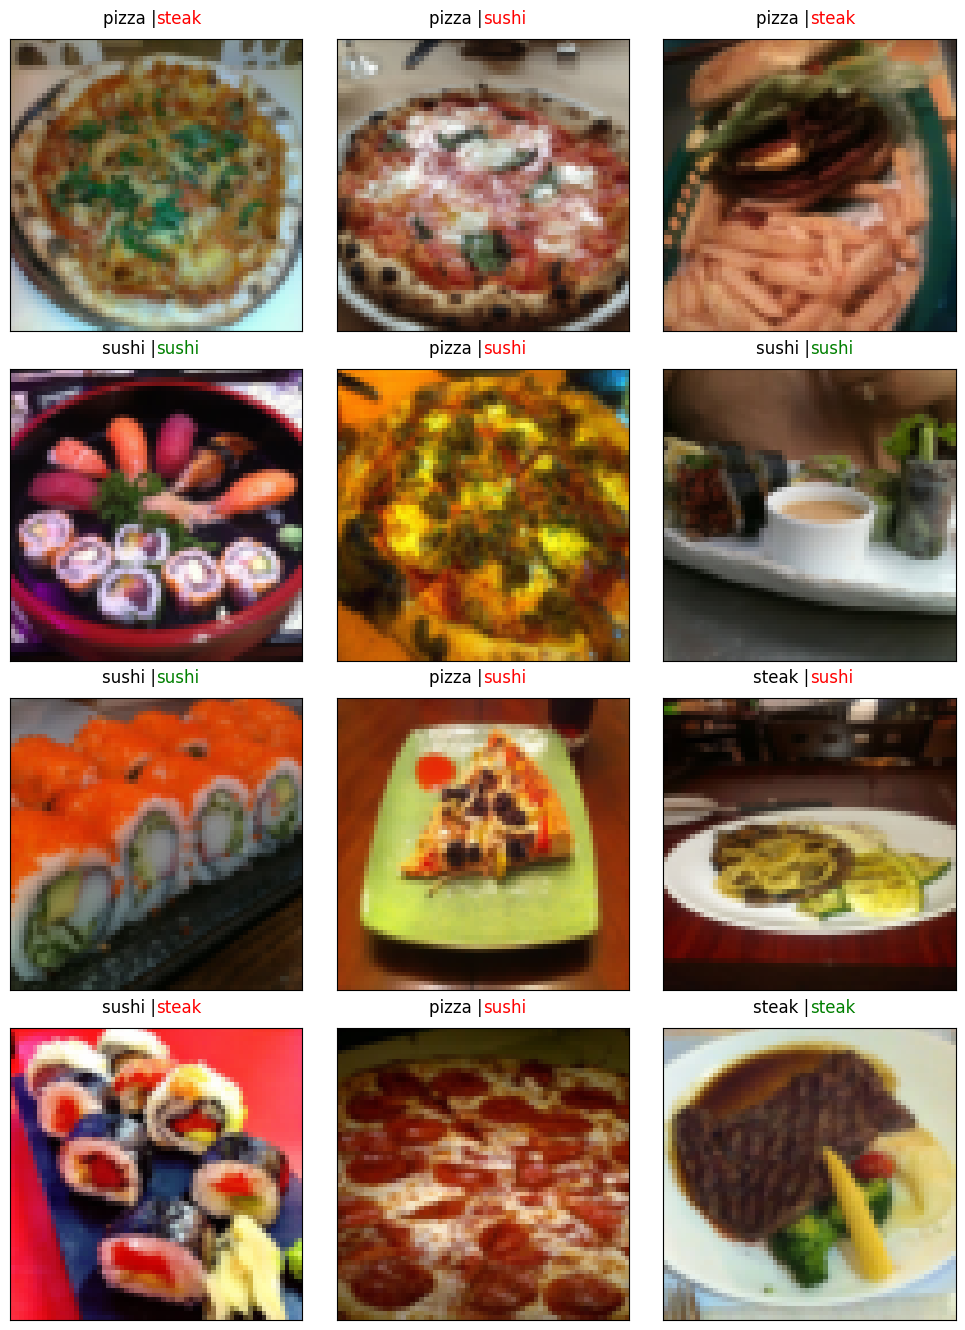

In [82]:
plotting.plot_predict_images(model=model, dataset=data.test_dataset)

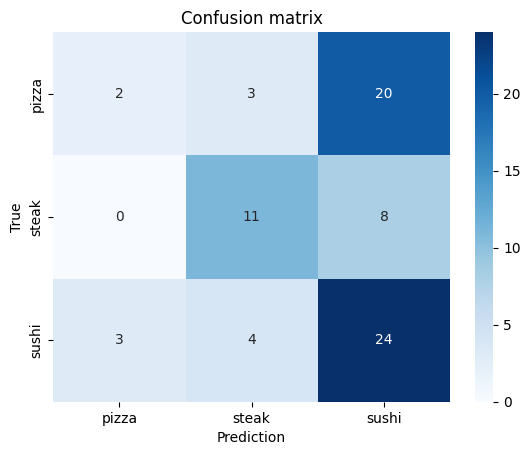

In [83]:
plotting.plot_confussion_matrix(model=model, dataset=data.test_dataset, normalize=False)

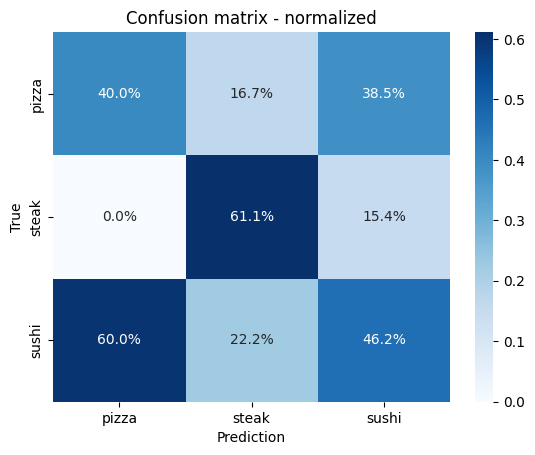

In [84]:
plotting.plot_confussion_matrix(model=model, dataset=data.test_dataset)